In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [12]:
classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'dear',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

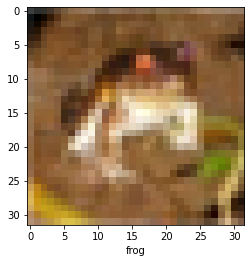

In [13]:
plot_sample(X_train, y_train, 0)

In [14]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [20]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train_norm, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: 2.1174 - accuracy: 0.2447
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.7393 - accuracy: 0.3742
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6528 - accuracy: 0.4041
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5881 - accuracy: 0.4328
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5367 - accuracy: 0.4527


In [21]:
ann.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5380 - accuracy: 0.4489


[1.5380312204360962, 0.4489000141620636]

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test_norm)
y_pred_classes = [np.argmax(v) for v in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1000
           1       0.61      0.52      0.56      1000
           2       0.31      0.22      0.26      1000
           3       0.38      0.13      0.20      1000
           4       0.34      0.48      0.40      1000
           5       0.35      0.40      0.38      1000
           6       0.43      0.59      0.50      1000
           7       0.53      0.52      0.53      1000
           8       0.45      0.74      0.56      1000
           9       0.62      0.40      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



In [30]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=6, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train_norm, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7379 - accuracy: 0.3680
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3200 - accuracy: 0.5308
Epoch 3/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.2183 - accuracy: 0.5652
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1276 - accuracy: 0.6019
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0473 - accuracy: 0.6305


In [31]:
cnn.evaluate(X_test_norm, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.1238 - accuracy: 0.6131


[1.1238125562667847, 0.613099992275238]

In [50]:
classes[np.argmax(cnn.predict(X_test_norm)[765])]

'bird'

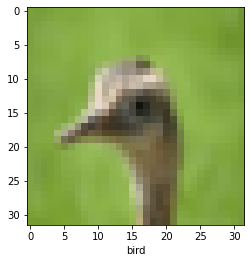

In [51]:
plot_sample(X_test, y_test, 765)

In [47]:
y_pred = cnn.predict(X_test_norm)
y_pred_classes = [np.argmax(v) for v in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1000
           1       0.71      0.81      0.75      1000
           2       0.54      0.44      0.48      1000
           3       0.47      0.33      0.39      1000
           4       0.50      0.58      0.54      1000
           5       0.50      0.54      0.52      1000
           6       0.74      0.64      0.69      1000
           7       0.60      0.75      0.67      1000
           8       0.73      0.67      0.70      1000
           9       0.66      0.72      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000

